# 94812 Applications of NL(X) and LLM - Assignment 1
Author: Yi-Hsueh(Alex) Yang

## 1. Web Scraping

I'm using a combination of beautifulsoup and selenium for scraping article titles from medium.com. Beautifulsoup handles the structure of the data, doing the actual scraping while selenium plays a significant role here to interact with Chrome to combat its dynamic webpage setting.

In [1]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time

In [2]:
url = 'https://medium.com/'

# use chromedriver to automate the scrolling process
driver = webdriver.Chrome('/Users/alexyang/Documents/chromedriver-mac-arm64/chromedriver')
driver.get(url)

for i in range(10):  
    driver.find_element(By.TAG_NAME, 'body').send_keys(Keys.END)
    time.sleep(2)  # time interval between each scroll

soup = BeautifulSoup(driver.page_source, 'html.parser') # parse the scraped data into a soup object

/var/folders/zs/j91wn79j45lccf78212k1pp80000gn/T/ipykernel_81972/584820485.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('/Users/alexyang/Documents/chromedriver-mac-arm64/chromedriver')


In [30]:
# navigate to the correct strucutre of the html to get the article titles
elements = soup.select('div.eq.al.az.ah a.bd.be.bf.bg.bh.bi.bj.bk.bl.bm.bn.bo.bp.bq.br h2') 

print("Number of title:", len(elements))

document = []
for title in elements:    
    document.append(title.get_text().strip())

print(document[:5])

Number of title: 100
['Stanley hype and Samba cringe: Why products fall in and out of style', 'Is Barbie’s Password ‘uiff;rnl’?', 'If you want to be creative, you can’t be certain', 'The Astonishing Origins of 6 Common Compound Words', 'How I Won Singapore’s GPT-4 Prompt Engineering Competition']


In [4]:
# write the scraped data into a txt document for future use

# file = open('titles.txt', 'w')
# for i in document:
#     file.write(i + '\n')

# file.close()

## 2. Named Entity Recognition (NER)

#### SpaCy

In [5]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [6]:
file = open('titles.txt', 'r')
text, label = [], []

for line in file.readlines():
    doc = nlp(line)
    for ent in doc.ents: # record all text and entity pair recognized
        text.append(ent.text)
        label.append(ent.label_)
        print(f"Text: {ent.text}, Entity: {ent.label_}")

Text: Stanley, Entity: ORG
Text: Samba, Entity: ORG
Text: Barbie, Entity: PERSON
Text: 6, Entity: CARDINAL
Text: GPT-4 Prompt Engineering Competition, Entity: WORK_OF_ART
Text: 20 years, Entity: DATE
Text: Skywalker Ranch, Entity: PRODUCT
Text: James Brown’s, Entity: PERSON
Text: Cold Sweat, Entity: WORK_OF_ART
Text: Martin Luther King Jr, Entity: PERSON
Text: 40, Entity: DATE
Text: This Year, Entity: DATE
Text: Japan, Entity: GPE
Text: Always Prepared, Entity: PERSON
Text: The Ultimate Guide for Making the Best Career Choices, Entity: ORG
Text: Tech, Entity: ORG
Text: 2023, Entity: DATE
Text: Trudeau, Entity: PERSON
Text: 1, Entity: CARDINAL
Text: Memphis, Entity: GPE
Text: TN, Entity: ORG
Text: Four, Entity: CARDINAL
Text: the Art of Mountain Biking, Entity: GPE
Text: 2023, Entity: CARDINAL
Text: Neuroscience, Entity: GPE
Text: NY Times, Entity: ORG
Text: 12, Entity: CARDINAL
Text: Trailblazers: Meet the Women Transforming AI, Entity: WORK_OF_ART
Text: 108, Entity: CARDINAL
Text: 202

In [7]:
import pandas as pd

# aggregate the data and prepare them for distribution visualization
df = pd.DataFrame({'text': text, 'label':label})
label_group = df.groupby('label').count().sort_values(by='text', ascending=False)
label_group

,text
label,
ORG,23
CARDINAL,15
PERSON,14
DATE,11
GPE,10
WORK_OF_ART,6
NORP,4
PRODUCT,3
LOC,1


Text(0, 0.5, 'Frequency')

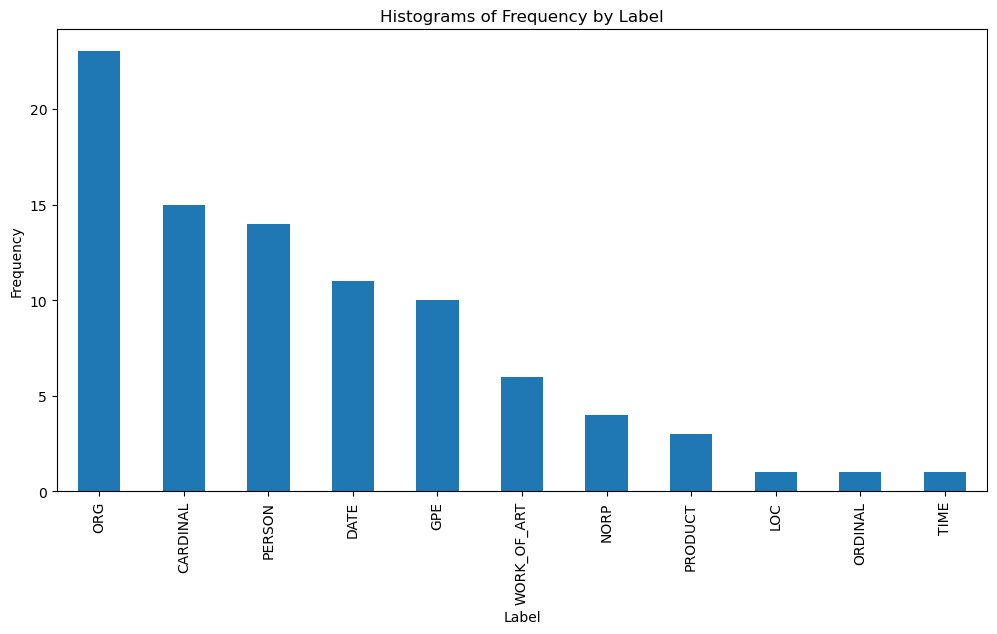

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

label_group['text'].plot(kind='bar')

plt.title('Histograms of Frequency by Label')
plt.xlabel('Label')
plt.ylabel('Frequency')

#### NLTK

Also tried with NLTK to see if there is some difference compare to spaCy.

In [21]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /Users/alexyang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/alexyang/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/alexyang/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/alexyang/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [23]:
file = open('titles.txt', 'r')
all_names = []

for line in file.readlines():
    words = nltk.word_tokenize(line)
    pos_tags = nltk.pos_tag(words)
    named_entities = nltk.ne_chunk(pos_tags)
    all_names.append(named_entities)
    print(named_entities)


(S
  (GPE Stanley/NNP)
  hype/NN
  and/CC
  (PERSON Samba/NNP)
  cringe/NN
  :/:
  Why/WRB
  products/NNS
  fall/NN
  in/IN
  and/CC
  out/IN
  of/IN
  style/NN)
(S
  Is/VBZ
  (PERSON Barbie/NNP)
  ’/NNP
  s/NN
  (PERSON Password/NNP)
  ‘/NNP
  uiff/NN
  ;/:
  rnl/VB
  ’/CD
  ?/.)
(S
  If/IN
  you/PRP
  want/VBP
  to/TO
  be/VB
  creative/JJ
  ,/,
  you/PRP
  can/MD
  ’/VB
  t/RB
  be/VB
  certain/JJ)
(S
  The/DT
  Astonishing/NNP
  Origins/NNP
  of/IN
  6/CD
  (ORGANIZATION Common/NNP Compound/NNP)
  Words/NNP)
(S
  How/WRB
  I/PRP
  Won/VBD
  (PERSON Singapore/NNP)
  ’/NNP
  s/VBD
  GPT-4/NNP
  Prompt/NNP
  Engineering/NNP
  Competition/NN)
(S
  (GPE Advice/NN)
  to/TO
  my/PRP$
  younger/JJR
  self/NN
  and/CC
  you/PRP
  after/IN
  20/CD
  years/NNS
  in/IN
  programming/NN)
(S At/IN (ORGANIZATION Skywalker/NNP) Ranch/NNP We/PRP Were/VBP)
(S
  The/DT
  (ORGANIZATION Algorithmic/NNP Nature/NNP)
  of/IN
  (PERSON James/NNP Brown/NNP)
  ’/NNP
  s/VBD
  “/NNP
  Cold/NNP
  Sweat/NNP
  ”

In [27]:
text, label = [], []

for name_ent in all_names:
    for chunk in name_ent:
        if hasattr(chunk, 'label'):
            # Following the same logic, i record the recognized text and entity pairs
            text.append(''.join(c[0] for c in chunk))
            label.append(chunk.label())
            print(chunk.label(), ' '.join(c[0] for c in chunk))

GPE Stanley
PERSON Samba
PERSON Barbie
PERSON Password
ORGANIZATION Common Compound
PERSON Singapore
GPE Advice
ORGANIZATION Skywalker
ORGANIZATION Algorithmic Nature
PERSON James Brown
PERSON Martin
PERSON Luther King Jr Was
GPE Gaylor
GPE Japan
ORGANIZATION Ultimate Guide
GPE Tech
PERSON Advanced Manual
PERSON Trudeau
PERSON Bear Witness
PERSON Memphis
ORGANIZATION TN
ORGANIZATION Four Stages
GPE Sleep
ORGANIZATION Van
GPE Zen
ORGANIZATION Art
GPE Mountain
GPE Neuroscience
PERSON Times
FACILITY Favorite Albums
PERSON Wiki Loves
ORGANIZATION Medium
PERSON Grief
ORGANIZATION Holidays
PERSON Norman Lear
PERSON Love AI
ORGANIZATION Human Rights Are Universal
GPE Middle
ORGANIZATION Performance Reviews
GPE Data
ORGANIZATION Meta
ORGANIZATION Life Stats
ORGANIZATION FAANG
ORGANIZATION JavaScript
ORGANIZATION Cracks Get Too
PERSON Sandra
PERSON Food
GPE Twin
GPE U.S.
ORGANIZATION Trouble With Teachability
ORGANIZATION First Sign Mom
ORGANIZATION No Homework Policy
ORGANIZATION Corporate Gov

In [28]:
# Aggregation and data preparation
df = pd.DataFrame({'text': text, 'label':label})
label_group = df.groupby('label').count().sort_values(by='text', ascending=False)
label_group

,text
label,
PERSON,45
ORGANIZATION,43
GPE,30
FACILITY,1


Text(0, 0.5, 'Frequency')

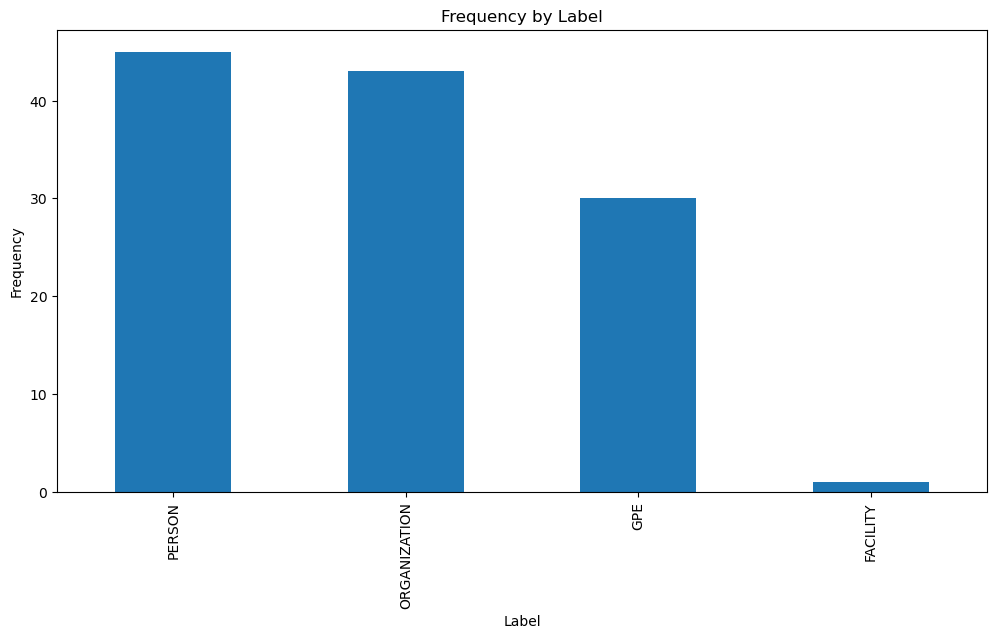

In [31]:
# Visualization of the frequency to each label categories
plt.figure(figsize=(12, 6))

label_group['text'].plot(kind='bar')

plt.title('Frequency by Label')
plt.xlabel('Label')
plt.ylabel('Frequency')

## 3. Sentiment Analysis

I'm using TextBlob to get the sentiment of polarity and subjectivity of each article titles. 

In [9]:
from textblob import TextBlob

file = open('titles.txt', 'r')
colab_sentiment = []

for line in file.readlines():
    blob = TextBlob(line)
    sentiment = blob.sentiment
    colab_sentiment.append((sentiment[0], sentiment[1]))
    print(f'Title: {line}\nSentiment:{sentiment}\n')

Title: Stanley hype and Samba cringe: Why products fall in and out of style

Sentiment:Sentiment(polarity=0.0, subjectivity=0.0)

Title: Is Barbie’s Password ‘uiff;rnl’?

Sentiment:Sentiment(polarity=0.0, subjectivity=0.0)

Title: If you want to be creative, you can’t be certain

Sentiment:Sentiment(polarity=0.35714285714285715, subjectivity=0.7857142857142857)

Title: The Astonishing Origins of 6 Common Compound Words

Sentiment:Sentiment(polarity=0.1, subjectivity=0.75)

Title: How I Won Singapore’s GPT-4 Prompt Engineering Competition

Sentiment:Sentiment(polarity=0.0, subjectivity=0.0)

Title: Advice to my younger self and you after 20 years in programming

Sentiment:Sentiment(polarity=0.0, subjectivity=0.0)

Title: At Skywalker Ranch We Were

Sentiment:Sentiment(polarity=0.0, subjectivity=0.0)

Title: The Algorithmic Nature of James Brown’s “Cold Sweat”

Sentiment:Sentiment(polarity=-0.6, subjectivity=1.0)

Title: Martin Luther King Jr Was More Radical Than You Think

Sentiment:Se

Text(0.5, 1.0, 'Distribution of sentiments across article titles')

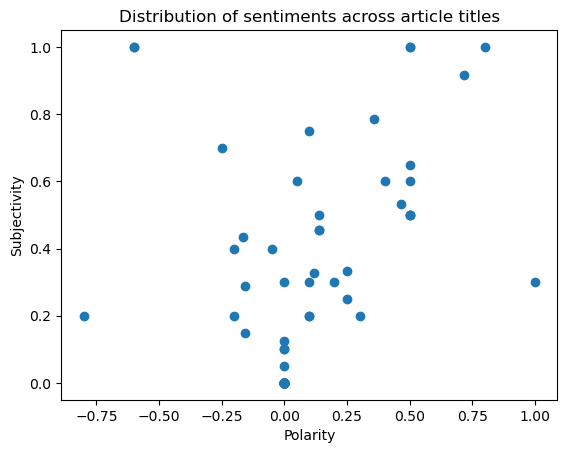

In [10]:
# Visualization of the distribution of the sentiments across article titles
x, y = zip(*colab_sentiment)

plt.scatter(x, y)
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.title('Distribution of sentiments across article titles')

## 4. Topic Modeling

I used both LDA and NMF for topic modeling. Due to the size of the input data, i'm only trying to get 5 topics.

In [11]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from gensim import corpora, models
import gensim as gs

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexyang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

# Preprocessing the title data

tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = tokenizer.tokenize(text.lower())
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return lemmatized_tokens

file = open('titles.txt', 'r')
processed_titles = [preprocess_text(line) for line in file.readlines()]

processed_titles[:5]

[['stanley', 'hype', 'samba', 'cringe', 'product', 'fall', 'style'],
 ['barbie', 'password', 'uiff', 'rnl'],
 ['want', 'creative', 'certain'],
 ['astonishing', 'origin', '6', 'common', 'compound', 'word'],
 ['singapore', 'gpt', '4', 'prompt', 'engineering', 'competition']]

#### LDA

In [20]:
# feed the processed data into the gensim corpora dictionary then to the LDA model

dictionary = gs.corpora.Dictionary(processed_titles)
corpus = [dictionary.doc2bow(text) for text in processed_titles]

ldamodel = gs.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.013*"get" + 0.013*"love" + 0.013*"thanksgiving" + 0.013*"stop"')
(1, '0.013*"year" + 0.013*"think" + 0.013*"learned" + 0.013*"life"')
(2, '0.013*"human" + 0.013*"trying" + 0.013*"reading" + 0.013*"new"')
(3, '0.026*"2023" + 0.020*"woman" + 0.014*"year" + 0.014*"favorite"')
(4, '0.012*"end" + 0.012*"day" + 0.012*"medium" + 0.007*"drawing"')


#### NMF

In [19]:
# Vectorize the processed data first and then feed in to the NMF model

vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform([' '.join(text) for text in processed_titles])

nmf_model = NMF(n_components=5, random_state=42)
nmf_model.fit(X)

feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf_model.components_):
    print(f"Topic #{topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))

Topic #0:
2023 favorite earth review love medium stop chatgpt ai year
Topic #1:
year self life learned word trying review second designer design
Topic #2:
day drawing new old time woman 40 ai walk stop
Topic #3:
end medium favorite year conflict matthew perry crack israel non
Topic #4:
think designer year artificial reading work human engineering tech best


Prompts used in ChatGPT 4.0 
https://chat.openai.com/share/58a11eb7-1280-44bb-a70a-95a1d6c1505f
